Detecting heart diseases using Machine Learning

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Mahika (1)/heart_disease_csv.csv")
df.shape

(1025, 14)

In [4]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [5]:
df.tail()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1
1024,54,Male,Typical angina,120,188,Lower than 120 mg/ml,ST-T wave abnormality,113,No,1.4,Flat,One,Reversable Defect,0


In [6]:
# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df)


In [7]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

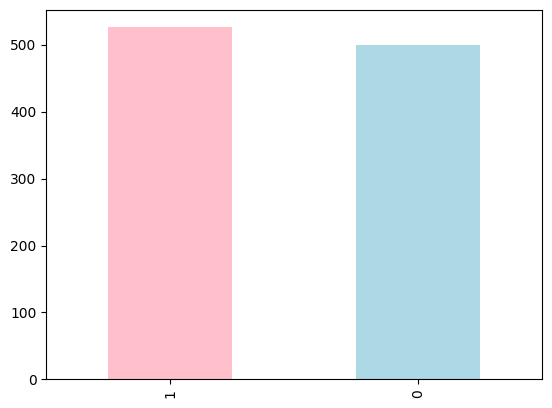

In [8]:
df["target"].value_counts().plot(kind="bar",color=["pink","lightblue"]);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [10]:
df.isna().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [11]:
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


Heart Disease Frequency acoording to Sex

In [12]:
df.sex.value_counts()

Male      713
Female    312
Name: sex, dtype: int64

In [13]:
#Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,Female,Male
target,,
0,86,413
1,226,300


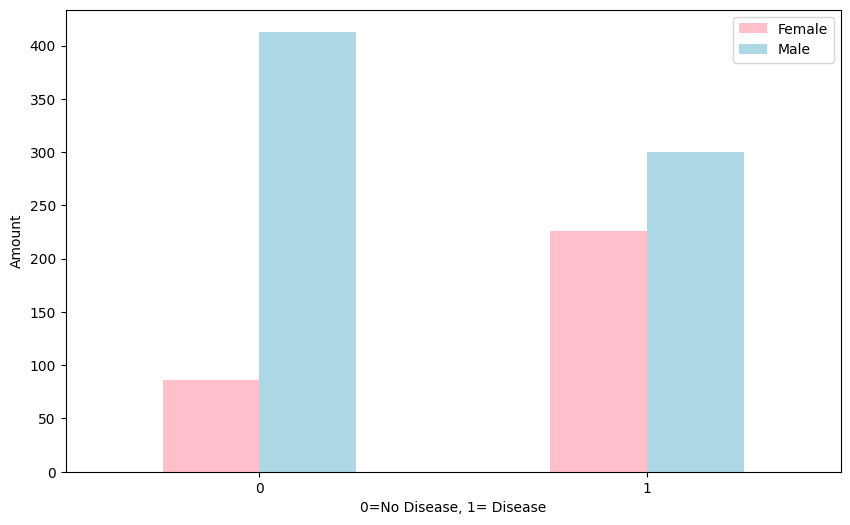

In [14]:
#create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6),color=["pink","lightblue"]);
plt.xlabel("0=No Disease, 1= Disease");
plt.ylabel("Amount");
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

Age vs Max Heart Rate for Heart Disease

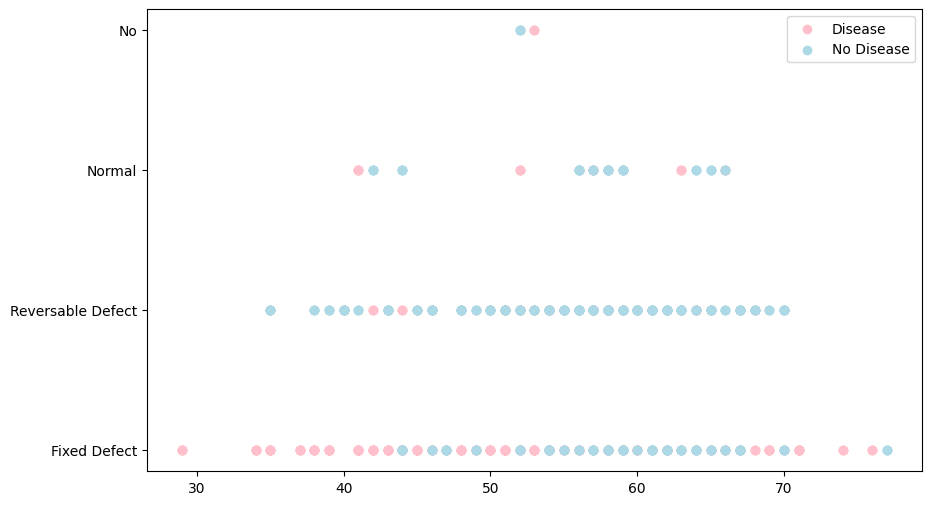

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
            df.thalassemia[df.target==1],
            c="pink");
plt.scatter(df.age[df.target==0],
            df.thalassemia[df.target==0],
            c="lightblue");
plt.legend(["Disease","No Disease"])

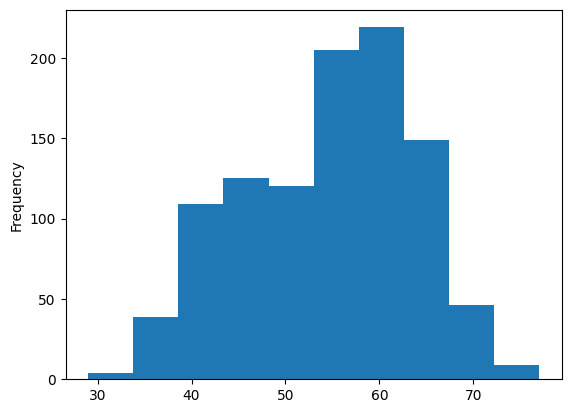

In [16]:
df.age.plot.hist();

Heart Disease Freq per Chest Pain Type

In [17]:
pd.crosstab(df.chest_pain_type, df.target)

target,0,1
chest_pain_type,,
Asymptomatic,26,51
Atypical angina,33,134
Non-anginal pain,65,219
Typical angina,375,122


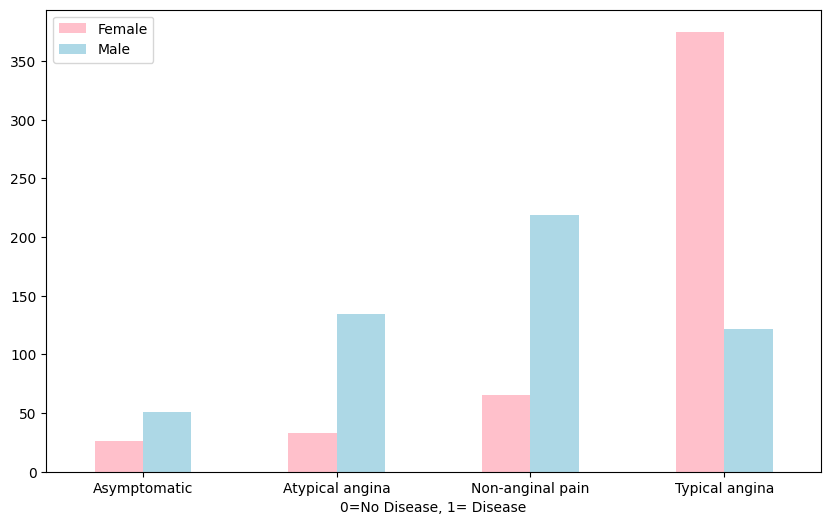

In [18]:
pd.crosstab(df.chest_pain_type,df.target).plot(kind="bar", figsize=(10,6),color=["pink","lightblue"]);
plt.xlabel("0=No Disease, 1= Disease");
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

In [19]:
df.corr()

<ipython-input-19-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
age,1.000000,0.271121,0.219823,-0.390227,0.208137,-0.229324
resting_blood_pressure,0.271121,1.000000,0.127977,-0.039264,0.187434,-0.138772
cholestoral,0.219823,0.127977,1.000000,-0.021772,0.064880,-0.099966
Max_heart_rate,-0.390227,-0.039264,-0.021772,1.000000,-0.349796,0.422895
oldpeak,0.208137,0.187434,0.064880,-0.349796,1.000000,-0.438441
target,-0.229324,-0.138772,-0.099966,0.422895,-0.438441,1.000000


<ipython-input-20-ceaae218ffd1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr();


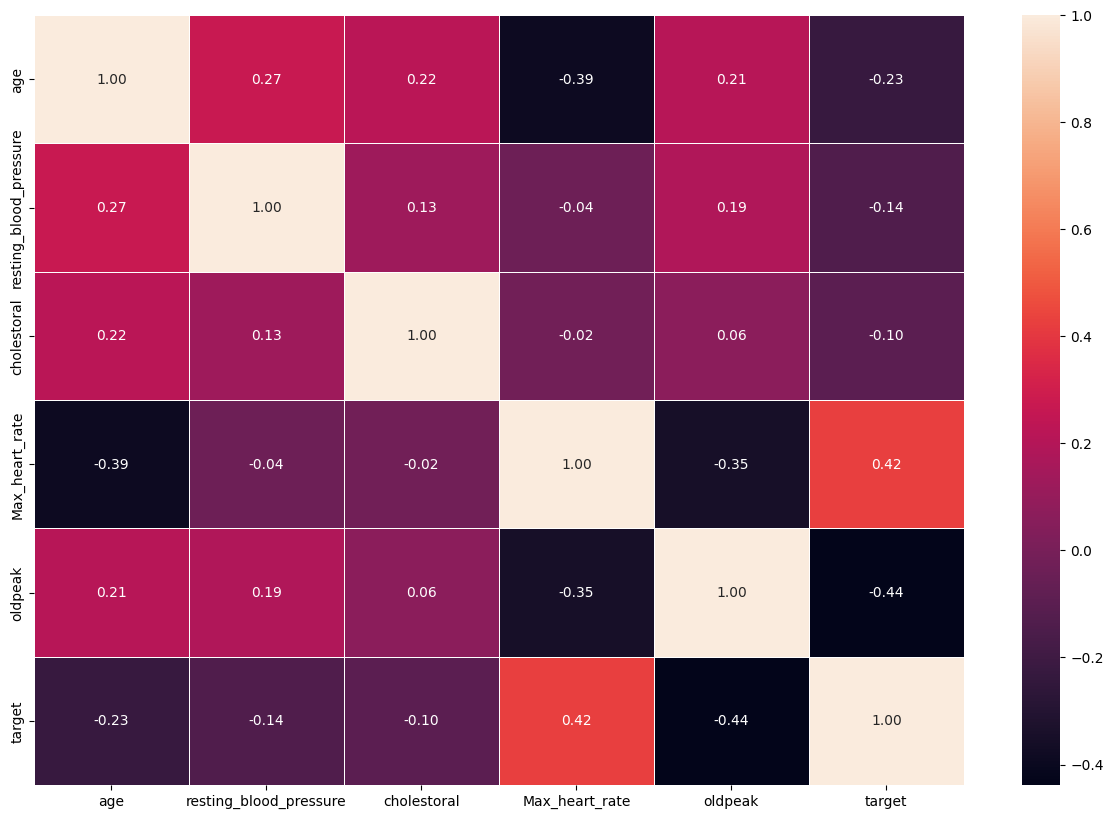

In [20]:
corr_matrix=df.corr();
fig, ax= plt.subplots(figsize=(15,10));
ax= sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f");

Modelling


In [21]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [22]:
X=df.drop("target",axis=1)
y=df["target"]

In [23]:
X_encoded = df_encoded.drop("target", axis=1)
y_encoded = df_encoded["target"]


In [24]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [25]:
np.random.seed(42)

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded=train_test_split(X,y,test_size=0.2)

In [26]:
X_train_encoded,len(X_train_encoded)

(     age     sex   chest_pain_type  resting_blood_pressure  cholestoral  \
 835   49    Male  Non-anginal pain                     118          149   
 137   64  Female    Typical angina                     180          325   
 534   54  Female  Non-anginal pain                     108          267   
 495   59    Male    Typical angina                     135          234   
 244   51    Male  Non-anginal pain                     125          245   
 ..   ...     ...               ...                     ...          ...   
 700   41    Male  Non-anginal pain                     130          214   
 71    61    Male    Typical angina                     140          207   
 106   51    Male    Typical angina                     140          299   
 270   43    Male    Typical angina                     110          211   
 860   52    Male    Typical angina                     112          230   
 
         fasting_blood_sugar               rest_ecg  Max_heart_rate  \
 835    Lower t

In [27]:
y_train_encoded,len(y_train_encoded)

(835    0
 137    1
 534    1
 495    1
 244    1
       ..
 700    1
 71     0
 106    0
 270    1
 860    0
 Name: target, Length: 820, dtype: int64,
 820)

In [28]:
models={"Logestic Regression":LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded):
  """
  Fits and evaluates given ML models.
  models: a dict of different Scikit-Learn ML models
  X_train: training data (no labels)
  X_test: testing data (no labels)
  y_train: training labels
  y_test: test labels
  """

  np.random.seed(42)
  model_scores={}
  for name, model in models.items():
    model.fit(X_train_encoded, y_train_encoded)
    model_scores[name]=model.score(X_test_encoded, y_test_encoded)
  return model_scores


In [29]:
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2)

model_scores = fit_and_score(models=models,
                             X_train_encoded=X_train_encoded,
                             X_test_encoded=X_test_encoded,
                             y_train_encoded=y_train_encoded,
                             y_test_encoded=y_test_encoded)
model_scores


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logestic Regression': 0.8536585365853658,
 'KNN': 0.7024390243902439,
 'Random Forest': 1.0}

model_compare

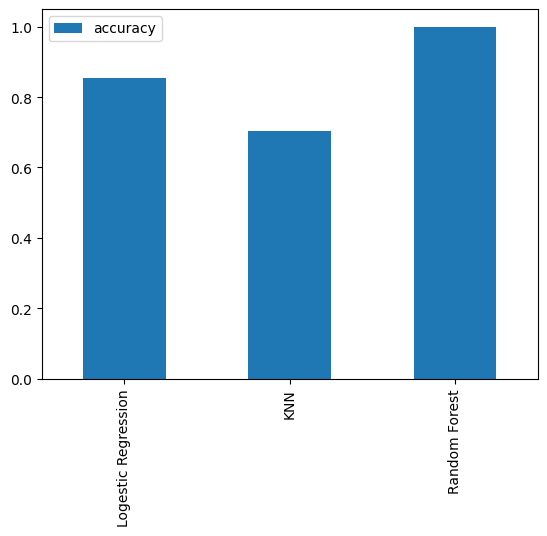

In [30]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

Hyperparameter tuning

In [31]:
from sklearn import neighbors
train_scores=[]
test_scores=[]

neighbors=range(1,21)
knn=KNeighborsClassifier()

for i in neighbors:
  knn.set_params(n_neighbors=i)

knn.fit(X_train_encoded,y_train_encoded)

train_scores.append(knn.score(X_train_encoded,y_train_encoded))

test_scores.append(knn.score(X_train_encoded,y_train_encoded))


In [32]:
train_scores

[0.7585365853658537]

In [33]:
test_scores

[0.7585365853658537]

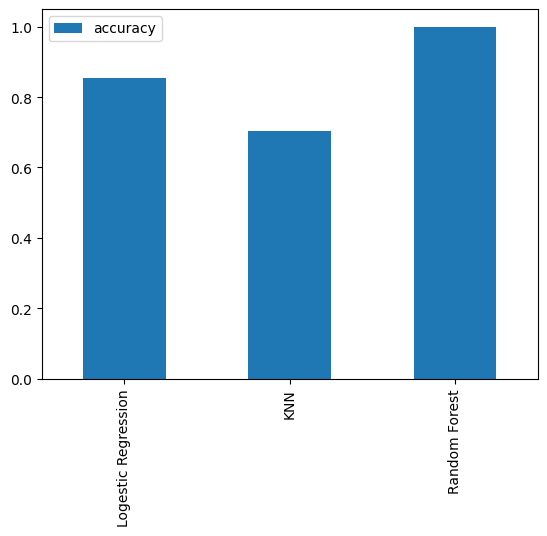

In [34]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

Hyperparameter tuning

In [35]:
from sklearn import neighbors
train_scores=[]
test_scores=[]

neighbors=range(1,21)
knn=KNeighborsClassifier()

for i in neighbors:
  knn.set_params(n_neighbors=i)

knn.fit(X_train_encoded,y_train_encoded)

train_scores.append(knn.score(X_train_encoded,y_train_encoded))

test_scores.append(knn.score(X_train_encoded,y_train_encoded))


In [36]:
train_scores

[0.7585365853658537]

In [37]:
test_scores

[0.7585365853658537]

Maximum KNN score on the test data: 98.54


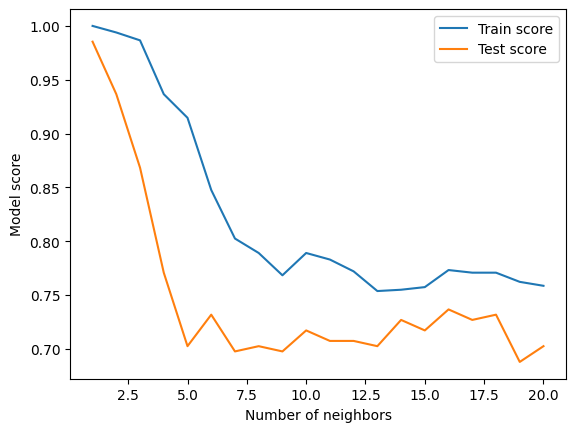

In [38]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_encoded, y_train_encoded)
    train_scores.append(knn.score(X_train_encoded, y_train_encoded))
    test_scores.append(knn.score(X_test_encoded, y_test_encoded))

plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}")

Hyperparameters tuning with RandomizedSearchCV

Logestic Regression

In [39]:
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}


In [40]:
np.arange(10,1000,50)

array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])

In [41]:
np.random.seed(42)

rs_log_reg= RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#Fit
rs_log_reg.fit(X_train_encoded,y_train_encoded)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [42]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 11.288378916846883}

In [43]:
rs_log_reg.score(X_test_encoded,y_test_encoded)

0.8585365853658536

Random Forest

In [44]:
np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)

rs_rf.fit(X_train_encoded,y_train_encoded)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [45]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [46]:
rs_rf.score(X_test_encoded,y_test_encoded)

0.9219512195121952

In [47]:
model_scores

{'Logestic Regression': 0.8536585365853658,
 'KNN': 0.7024390243902439,
 'Random Forest': 1.0}

Hyperparanter Tuning with GridSearchCV

In [48]:
#LR model
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}

gs_log_reg= GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(X_train_encoded,y_train_encoded);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [49]:
gs_log_reg.score(X_test_encoded,y_test_encoded)

0.8439024390243902

In [50]:
model_scores

{'Logestic Regression': 0.8536585365853658,
 'KNN': 0.7024390243902439,
 'Random Forest': 1.0}

Evaluating our tuned ML classifier

In [51]:
y_preds=rs_log_reg.predict(X_test_encoded)

In [52]:
y_preds

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1])

In [53]:
y_test_encoded

137     1
69      0
349     0
487     0
330     1
       ..
713     1
1012    0
483     1
902     0
651     1
Name: target, Length: 205, dtype: int64

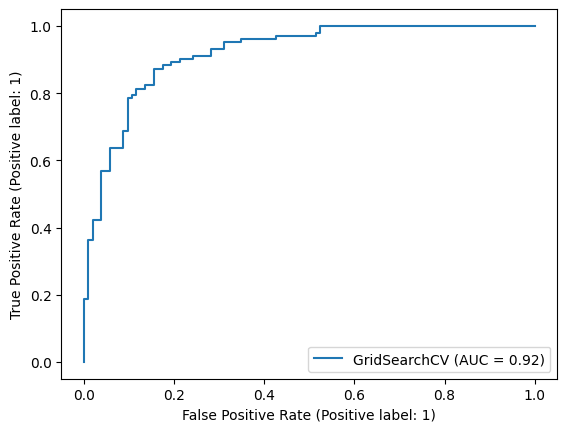

In [54]:
RocCurveDisplay.from_estimator(estimator=gs_log_reg, X=X_test_encoded, y=y_test_encoded);

In [55]:
#Confusion matrix
print(confusion_matrix(y_test_encoded,y_preds))

[[84 19]
 [10 92]]


In [56]:
sns.set(font_scale=2)

def plot_conf_mat(y_test_encoded,y_preds):
  """
  Plots a nice looking confusion matrix using Seaborn's heatmap()
  """
  fig,ax=plt.subplots(figsize=(3,3))
  ax=sns.heatmap(confusion_matrix(y_test_encoded,y_preds),
                 annot=True,
                 cbar=False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")

  plot_conf_mat(y_test_encoded,y_preds)

In [57]:
print(classification_report(y_test_encoded,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       103
           1       0.83      0.90      0.86       102

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



crooss-evaluation

In [58]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [59]:
clf=LogisticRegression(C=0.1082636733874054,
                       solver="liblinear")

In [60]:
cv_acc=cross_val_score(clf,
                       X_encoded,
                       y_encoded,
                       cv=5,
                       scoring="accuracy")
cv_acc

array([0.89268293, 0.87804878, 0.89268293, 0.84390244, 0.80487805])

In [61]:
cv_acc=np.mean(cv_acc)
cv_acc

0.862439024390244

In [62]:
cv_precision=cross_val_score(clf,
                       X_encoded,
                       y_encoded,
                       cv=5,
                       scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8441144218275097

In [63]:
cv_recall=cross_val_score(clf,
                       X_encoded,
                       y_encoded,
                       cv=5,
                       scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.8974842767295597

In [64]:
cv_f1=cross_val_score(clf,
                       X_encoded,
                       y_encoded,
                       cv=5,
                       scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8698741174275559

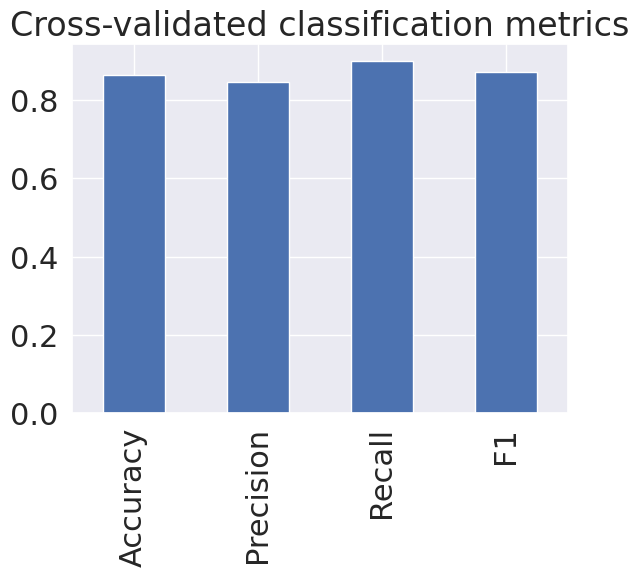

In [65]:
#Visualize
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_precision,
                         "Recall":cv_recall,
                         "F1":cv_f1},
                        index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

Feature Importance

In [66]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [67]:
#fit
clf=LogisticRegression(C=11.288378916846883,
                       solver="liblinear")
clf.fit(X_train_encoded,y_train_encoded)


LogisticRegression(C=11.288378916846883, solver='liblinear')

In [68]:
#check coef
clf.coef_

array([[ 0.02702254, -0.02733492, -0.00444106,  0.0253339 , -0.42897345,
         1.01104697, -1.07648468,  0.83662112, -0.39238848,  0.74530642,
        -1.25497678,  0.03920751, -0.10464521, -0.64983655,  0.03867291,
         0.54572593,  0.35279624, -0.41823395,  0.55641015, -0.67492167,
         0.05307381,  2.54614687, -0.87062892, -1.04655399, -2.04809699,
         1.35369533,  0.77899048, -1.29273653,  1.09943818, -0.65112983]])

In [69]:
#match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.02702254198018222,
 'sex': -0.027334918730100174,
 'chest_pain_type': -0.004441062895227585,
 'resting_blood_pressure': 0.025333896375191168,
 'cholestoral': -0.4289734504697518,
 'fasting_blood_sugar': 1.0110469695984001,
 'rest_ecg': -1.0764846770538055,
 'Max_heart_rate': 0.8366211244346115,
 'exercise_induced_angina': -0.39238847562810475,
 'oldpeak': 0.7453064219182186,
 'slope': -1.2549767781801384,
 'vessels_colored_by_flourosopy': 0.03920750687895502,
 'thalassemia': -0.10464521433451517,
 'target': -0.6498365545530642}

<Axes: title={'center': 'Feature Importance'}>

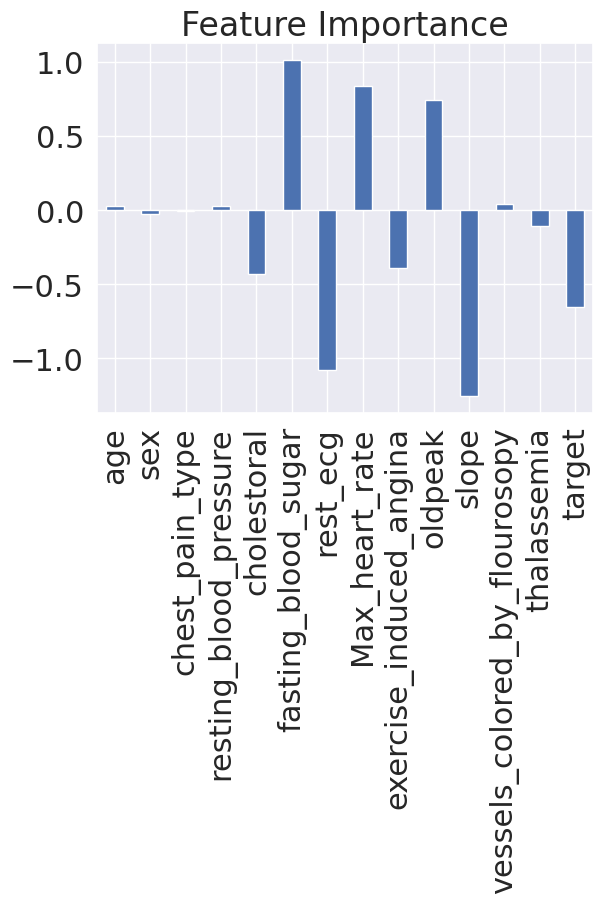

In [70]:
#visualise feat imp
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)